## Testing for other dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.pipeline import Pipeline

from mne import Epochs, pick_types, events_from_annotations
from mne.channels import make_standard_montage
from mne.datasets import eegbci
from mne.decoding import CSP
from mne.io import concatenate_raws, read_raw_edf

print(__doc__)

# #############################################################################
# # Set parameters and read data

# avoid classification of evoked responses by using epochs that start 1s after
# cue onset.
tmin, tmax = -1.0, 4.0
subject = 1
runs = [6, 10, 14]  # motor imagery: hands vs feet

raw_fnames = eegbci.load_data(subject, runs)
raw = concatenate_raws([read_raw_edf(f, preload=True) for f in raw_fnames])

Automatically created module for IPython interactive environment
Extracting EDF parameters from C:\Users\Hannah\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from C:\Users\Hannah\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from C:\Users\Hannah\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.pipeline import Pipeline

from mne import Epochs, pick_types, events_from_annotations
from mne.channels import make_standard_montage
from mne.datasets import eegbci
from mne.decoding import CSP
from mne.io import concatenate_raws, read_raw_edf

print(__doc__)

# #############################################################################
# # Set parameters and read data

# avoid classification of evoked responses by using epochs that start 1s after
# cue onset.
tmin, tmax = -1.0, 4.0
subject = 1
runs = [6, 10, 14]  # motor imagery: hands vs feet

raw_fnames = eegbci.load_data(subject, runs)
raw = concatenate_raws([read_raw_edf(f, preload=True) for f in raw_fnames])
eegbci.standardize(raw)  # set channel names
montage = make_standard_montage("standard_1005")
raw.set_montage(montage)
#raw.annotations.rename(dict(T1="hands", T2="feet"))


# Apply band-pass filter
raw.filter(7.0, 30.0, fir_design="firwin", skip_by_annotation="edge")

picks = pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False, exclude="bads")

# Read epochs (train will be done only between 1 and 2s)
# Testing will be done with a running classifier

events, _ = events_from_annotations(raw, event_id=dict(T1=2, T2=3)) #changed these two lines
event_id = dict(hands=2, feet=3)

#tmin, tmax applied here already
epochs = Epochs(
    raw,
    events = events, 
    event_id= event_id,
    tmin=tmin,
    tmax=tmax,
    proj=True,
    picks=picks,
    baseline=None,
    preload=True,
)
epochs_train = epochs.copy().crop(tmin=1.0, tmax=2.0)
labels = epochs.events[:, -1] - 2

epochs_data = epochs.get_data(copy=False)
epochs_data_train = epochs_train.get_data(copy=False)

Automatically created module for IPython interactive environment
Extracting EDF parameters from C:\Users\Hannah\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from C:\Users\Hannah\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from C:\Users\Hannah\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
combining channels using "gfp"


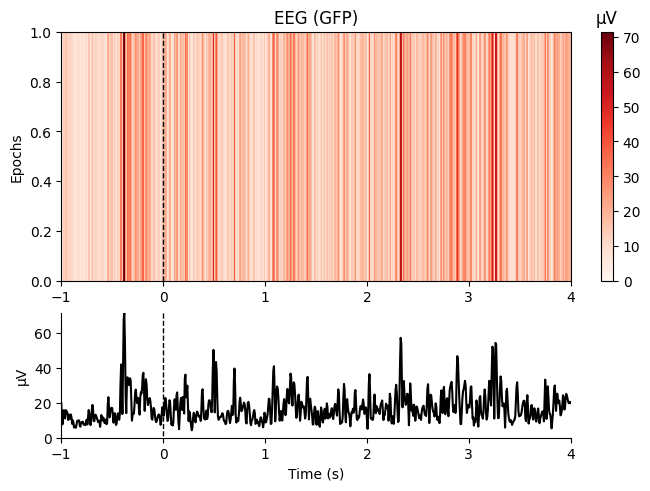

[<Figure size 640x480 with 3 Axes>]

In [3]:
epochs[0].plot_image()

## EEG Conformer


In [4]:
from braindecode.datasets import (
    create_from_mne_raw, create_from_mne_epochs)
from braindecode.preprocessing import create_windows_from_events
import mne
from mne.preprocessing import ICA
import sys

from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
import matplotlib_inline


sys.path.append('../models')

from eegconformer import EEGConformer




local


In [5]:
from sklearn.preprocessing import RobustScaler
import torch

# Assuming 'epochs_train' contains your epochs of interest

# Step 1: Extract EEG data from epochs
eeg_data = epochs.get_data()  # Shape: (n_epochs, n_channels, n_times)
print(eeg_data.shape)

# Step 2: Scale the EEG data
# Flatten the data for scaling, then scale, and reshape back
scaler = RobustScaler()
eeg_data_flattened = eeg_data.reshape(eeg_data.shape[0], -1)  # Flatten
eeg_data_scaled = scaler.fit_transform(eeg_data_flattened)
eeg_data_scaled = eeg_data_scaled.reshape(eeg_data.shape)  # Reshape back



(45, 64, 801)


C:\Users\Hannah\AppData\Local\Temp\ipykernel_13480\2033759025.py:7: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()  # Shape: (n_epochs, n_channels, n_times)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming eeg_data_scaled is your scaled EEG data in NumPy array format
# and labels is a NumPy array of your labels

# Split the data and labels into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(
    eeg_data_scaled,  # Scaled EEG data
    labels,  # Labels
    test_size=0.2,  # Specifies 20% of the data for testing
    random_state=42  # Ensures reproducibility of your split
)
# Encode the training and testing labels
le = LabelEncoder()
encoded_train_y = le.fit_transform(train_y)
encoded_test_y = le.transform(test_y)

# One-hot encode the encoded labels
train_y = pd.get_dummies(encoded_train_y)
test_y = pd.get_dummies(encoded_test_y)

In [7]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((36, 64, 801), (9, 64, 801), (36, 2), (9, 2))

In [8]:
cuda = torch.cuda.is_available()
print(cuda)
device = "cuda" if cuda else "cpu"

False


In [9]:

cuda_version = torch.version.cuda
cuda_version

In [10]:
seed = 20240216

model = EEGConformer(
    n_outputs=3,
    n_chans=64,
    sfreq=160,
    n_times = epochs_data.shape[2],
    n_filters_time=40, 
    filter_time_length=25,
    pool_time_length=75,
    pool_time_stride=15,
    drop_prob=0.7,
    att_depth=3,
    att_heads=10,
    att_drop_prob=0.7,
    final_fc_length='auto', # could be 'auto' or int
    return_features=False, # returns the features before the last classification layer if True
    chs_info=None,
    input_window_seconds=None,
    add_log_softmax=True,
)

print(model)

Layer (type (var_name):depth-idx)                            Input Shape               Output Shape              Param #                   Kernel Shape
EEGConformer (EEGConformer)                                  [1, 64, 801]              [1, 3]                    --                        --
├─_PatchEmbedding (patch_embedding): 1-1                     [1, 1, 64, 801]           [1, 47, 40]               --                        --
│    └─Sequential (shallownet): 2-1                          [1, 1, 64, 801]           [1, 40, 1, 47]            --                        --
│    │    └─Conv2d (0): 3-1                                  [1, 1, 64, 801]           [1, 40, 64, 777]          1,040                     [1, 25]
│    │    └─Conv2d (1): 3-2                                  [1, 40, 64, 777]          [1, 40, 1, 777]           102,440                   [64, 1]
│    │    └─BatchNorm2d (2): 3-3                             [1, 40, 1, 777]           [1, 40, 1, 777]           80             

c:\Users\Hannah\OneDrive\Documents\GitHub\eeg\notebooks\../models\base.py:180: UserWarning: LogSoftmax final layer will be removed! Please adjust your loss function accordingly (e.g. CrossEntropyLoss)!
  warnings.warn("LogSoftmax final layer will be removed! " +


In [11]:
if cuda:
    model.cuda()

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np



batch_size = 64

# Convert pandas dataframe (.values) to numpy, then find argmax if one-hot encoded
if len(train_y.shape) > 1:  # Check if train_y is one-hot encoded
    train_y_indices = np.argmax(train_y.values, axis=1)
else:
    train_y_indices = train_y.values  # Assuming it's already appropriate format

if len(test_y.shape) > 1:  # Check if test_y is one-hot encoded
    test_y_indices = np.argmax(test_y.values, axis=1)
else:
    test_y_indices = test_y.values  # Assuming it's already appropriate format

# Convert features and labels to tensors
x_train_tensor = torch.from_numpy(train_X).to(torch.float32).to(device)
y_train_tensor = torch.tensor(train_y_indices).to(torch.long).to(device)  # Use torch.long for class indices

x_test_tensor = torch.from_numpy(test_X).to(torch.float32).to(device)
y_test_tensor = torch.tensor(test_y_indices).to(torch.long).to(device)  # Use torch.long for class indices

# Create datasets and loaders
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(x_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0002, betas=(0.9, 0.999))


In [13]:
def train(model, x_train, y_train, x_test, y_test, save_path='../models/', n_epochs=100):
    """
    the training function.
    Attributes:
    - model: the instance of the network
    - save_path: the path to which the model state will be saved. None means w/o saving.

    Return: 
    the best model if save_path is not None, the last model otherwise
    """
    train_acc_list = []
    train_loss_list = []
    test_acc_list = []
    test_loss_list = []


    best_accuracy = 0.0
    
    for epoch in range(n_epochs):
        model.train()  # Set model to training mode
        training_loss = 0.0
        total = 0
        correct = 0
        
        for inputs, labels in tqdm(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()  # Zero the parameter gradients
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            training_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()  # Update correction on how labels are handled
        
        train_loss = training_loss / len(train_loader)
        train_accuracy = correct / total
        train_acc_list.append(train_accuracy)
        train_loss_list.append(train_loss)
        
        model.eval()  # Set model to evaluation mode
        testing_loss = 0.0
        total = 0
        correct = 0
        
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                testing_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
            test_loss = testing_loss / len(test_loader)
            test_accuracy = correct / total
            test_acc_list.append(test_accuracy)
            test_loss_list.append(test_loss)
            
            if test_accuracy > best_accuracy:
                best_accuracy = test_accuracy
                best_model_wts = model.state_dict()
        
        print(f"Epoch {epoch+1}/{n_epochs} - Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
    
    if save_path is not None and best_accuracy > 0:
        torch.save(best_model_wts, save_path + 'best_model.pth')
        print("Best model saved with accuracy: {:.4f}".format(best_accuracy))
    
    # Load best model weights
    model.load_state_dict(best_model_wts)
    return model, train_acc_list, train_loss_list, test_acc_list, test_loss_list

In [14]:
best_model, train_acc_list, train_loss_list, test_acc_list, test_loss_list = train(model, train_X, test_X, train_y, test_y, n_epochs=1000)


100%|██████████| 1/1 [00:00<00:00,  2.32it/s]


Epoch 1/1000 - Train Loss: 1.1313, Train Accuracy: 0.2778, Test Loss: 0.9245, Test Accuracy: 0.6667


100%|██████████| 1/1 [00:00<00:00,  2.74it/s]


Epoch 2/1000 - Train Loss: 1.0158, Train Accuracy: 0.4167, Test Loss: 0.8722, Test Accuracy: 0.6667


100%|██████████| 1/1 [00:00<00:00,  2.72it/s]


Epoch 3/1000 - Train Loss: 1.0100, Train Accuracy: 0.3611, Test Loss: 0.8410, Test Accuracy: 0.6667


100%|██████████| 1/1 [00:00<00:00,  2.81it/s]


Epoch 4/1000 - Train Loss: 1.0029, Train Accuracy: 0.4444, Test Loss: 0.8209, Test Accuracy: 0.5556


100%|██████████| 1/1 [00:00<00:00,  2.51it/s]


Epoch 5/1000 - Train Loss: 0.8586, Train Accuracy: 0.6111, Test Loss: 0.8083, Test Accuracy: 0.3333


100%|██████████| 1/1 [00:00<00:00,  2.84it/s]


Epoch 6/1000 - Train Loss: 0.8651, Train Accuracy: 0.5000, Test Loss: 0.8026, Test Accuracy: 0.3333


100%|██████████| 1/1 [00:00<00:00,  2.71it/s]


Epoch 7/1000 - Train Loss: 0.7938, Train Accuracy: 0.6111, Test Loss: 0.8034, Test Accuracy: 0.3333


100%|██████████| 1/1 [00:00<00:00,  2.77it/s]


Epoch 8/1000 - Train Loss: 0.7896, Train Accuracy: 0.5278, Test Loss: 0.8056, Test Accuracy: 0.3333


100%|██████████| 1/1 [00:00<00:00,  2.71it/s]


Epoch 9/1000 - Train Loss: 0.8038, Train Accuracy: 0.5278, Test Loss: 0.8121, Test Accuracy: 0.3333


100%|██████████| 1/1 [00:00<00:00,  2.85it/s]


Epoch 10/1000 - Train Loss: 0.7807, Train Accuracy: 0.5556, Test Loss: 0.8195, Test Accuracy: 0.3333


100%|██████████| 1/1 [00:00<00:00,  2.32it/s]


Epoch 11/1000 - Train Loss: 0.7658, Train Accuracy: 0.5556, Test Loss: 0.8323, Test Accuracy: 0.3333


100%|██████████| 1/1 [00:00<00:00,  2.74it/s]


Epoch 12/1000 - Train Loss: 0.7259, Train Accuracy: 0.6389, Test Loss: 0.8480, Test Accuracy: 0.3333


100%|██████████| 1/1 [00:00<00:00,  2.87it/s]


Epoch 13/1000 - Train Loss: 0.7854, Train Accuracy: 0.5278, Test Loss: 0.8613, Test Accuracy: 0.3333


100%|██████████| 1/1 [00:00<00:00,  2.68it/s]


Epoch 14/1000 - Train Loss: 0.7994, Train Accuracy: 0.6111, Test Loss: 0.8683, Test Accuracy: 0.3333


100%|██████████| 1/1 [00:00<00:00,  2.72it/s]


Epoch 15/1000 - Train Loss: 0.8600, Train Accuracy: 0.4722, Test Loss: 0.8702, Test Accuracy: 0.3333


100%|██████████| 1/1 [00:00<00:00,  2.78it/s]


Epoch 16/1000 - Train Loss: 0.7248, Train Accuracy: 0.6111, Test Loss: 0.8683, Test Accuracy: 0.3333


100%|██████████| 1/1 [00:00<00:00,  2.85it/s]


Epoch 17/1000 - Train Loss: 0.7332, Train Accuracy: 0.5278, Test Loss: 0.8648, Test Accuracy: 0.3333


100%|██████████| 1/1 [00:00<00:00,  2.73it/s]


Epoch 18/1000 - Train Loss: 0.7583, Train Accuracy: 0.5000, Test Loss: 0.8592, Test Accuracy: 0.3333


100%|██████████| 1/1 [00:00<00:00,  2.87it/s]


Epoch 19/1000 - Train Loss: 0.7465, Train Accuracy: 0.5000, Test Loss: 0.8514, Test Accuracy: 0.3333


100%|██████████| 1/1 [00:00<00:00,  2.72it/s]


Epoch 20/1000 - Train Loss: 0.7135, Train Accuracy: 0.5278, Test Loss: 0.8388, Test Accuracy: 0.3333


100%|██████████| 1/1 [00:00<00:00,  2.73it/s]


Epoch 21/1000 - Train Loss: 0.6894, Train Accuracy: 0.6667, Test Loss: 0.8250, Test Accuracy: 0.3333


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
plt.plot(train_acc_list, label='train_acc')
plt.plot(test_acc_list, label='test_acc')
plt.xlabel('epoch')

In [ ]:
plt.plot(train_loss_list, label='train_loss')
plt.plot(test_loss_list, label='test_loss')
plt.xlabel('epoch')

In [ ]:
best_model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        outputs = best_model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        # Remove the incorrect line attempting to use torch.max on labels
        total += labels.size(0)
        correct += (predicted == labels).sum().item()  # Compare predicted directly to labels
    
    test_accuracy = correct / total

print(f"Test Accuracy: {test_accuracy:.4f}")
